# Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import math


In [2]:
import plotly.express as px

In [3]:
import os
import json

In [4]:
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)
from tensorflow import keras


In [5]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [6]:
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)


# Users Dataset

In [7]:
userDataset = pd.read_csv('data/raw_data/steam_users_purchase_play.csv')

In [8]:
dfUsers = pd.DataFrame(userDataset)

In [9]:
display(dfUsers)

,user_id,game_name,hours,purchase,play
0,151603712,The Elder Scrolls V Skyrim,273.0,1,1
1,151603712,Fallout 4,87.0,1,1
2,151603712,Spore,14.9,1,1
3,151603712,Fallout New Vegas,12.1,1,1
4,151603712,Left 4 Dead 2,8.9,1,1
...,...,...,...,...,...
128799,128470551,Fallen Earth,2.4,1,1
128800,128470551,Magic Duels,2.2,1,1
128801,128470551,Titan Souls,1.5,1,1
128802,128470551,Grand Theft Auto Vice City,1.5,1,1


# Games Dataset

In [10]:
games2005 = pd.read_csv('data/raw_data/year 2005-2008.csv')
games2008 = pd.read_csv('data/raw_data/year 2008-2011.csv')
games2011 = pd.read_csv('data/raw_data/year 2011-2014.csv')
games2014 = pd.read_csv('data/raw_data/year 2014-2017.csv')
games2017 = pd.read_csv('data/raw_data/year 2017-2022.csv')


In [11]:
dtf_users005 = pd.DataFrame(games2005)
dtf_users008 = pd.DataFrame(games2008)
dtf_users011 = pd.DataFrame(games2011)
dtf_users014 = pd.DataFrame(games2014)
dtf_users017 = pd.DataFrame(games2017)

In [12]:
dfGames = pd.concat([dtf_users005, dtf_users008,dtf_users011,dtf_users014,dtf_users017], axis=0)

In [13]:
display(dfGames)

,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,genres/0/id,genres/0/name,...,franchises/39/id,franchises/39/name,franchises/40/id,franchises/40/name,franchises/41/id,franchises/41/name,franchises/42/id,franchises/42/name,genres/6/id,genres/6/name
0,1615,11,22,Mortal Kombat,750,Mortal Kombat,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4935,0,3147,Marvel,124,Marvel,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38725,0,4281,Zenonia,1818,Zenonia,1,Single player,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5444,0,1327,PixelJunk,2180,PixelJunk,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19622,0,2193,Naruto: Clash of Ninja,221,Naruto,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,96209,0,91,FIFA,1110,FIFA,1,Single player,14,Sport,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,83727,0,1956,Call of Duty: Black Ops,726,Call of Duty,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,96467,0,5490,cave digger,1320,cave digger,1,Single player,13,Simulator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,138933,0,1150,Five Nights at Freddy's,2854,Five Nights at Freddy's,1,Single player,13,Simulator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

i=1
for i in range(1,9):
    print(str(i)) 
    expansion_file= pd.read_csv('data/raw_data/Expansion_data_'+str(i)+'.csv') 
    expansion_file
    expansion_data=pd.DataFrame(expansion_file)
    dfGames =pd.concat([dfGames,expansion_file],axis=0)
    display(expansion_file)


1


,id,category,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,game_modes/1/id,game_modes/1/name,genres/0/id,genres/0/name,...,keywords/10/name,keywords/11/id,keywords/11/name,keywords/12/id,keywords/12/name,keywords/13/id,keywords/13/name,keywords/14/id,keywords/14/name,keywords/15/id
0,94890,0,165,Rambo,1,Single player,3.0,Co-operative,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1615,11,750,Mortal Kombat,1,Single player,NaN,NaN,4,Fighting,...,day/night cycle,3486.0,boss fight,3833.0,bosses,4134.0,digital distribution,4179.0,throwing weapons,4187.0
2,21231,0,221,Naruto,1,Single player,2.0,Multiplayer,4,Fighting,...,anime-based,3776.0,shuriken,4142.0,licensed game,4161.0,jump,4179.0,throwing weapons,4310.0
3,84173,3,279,Tomb Raider,1,Single player,NaN,NaN,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12027,0,607,.Hack,1,Single player,NaN,NaN,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7995,0,472,El Tigre,1,Single player,NaN,NaN,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,72786,0,3851,Pingu,1,Single player,NaN,NaN,2,Point-and-click,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,51933,0,1158,Police Quest,1,Single player,2.0,Multiplayer,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,3669,0,84,Shrek,1,Single player,2.0,Multiplayer,8,Platform,...,licensed game,4162.0,anthropomorphism,4210.0,split-screen multiplayer,4329.0,cat,4345.0,bink video,4353.0


2


,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,genres/0/id,genres/0/name,...,keywords/114/id,keywords/114/name,keywords/115/id,keywords/115/name,keywords/116/id,keywords/116/name,keywords/117/id,keywords/117/name,keywords/118/id,keywords/118/name
0,176043,0,605.0,F-Zero,1764,F-Zero,1,Single player,10,Racing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,144500,5,543.0,Dark Souls,492,"The ""Souls"" series",1,Single player,31,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172501,11,7338.0,Game Watch,596,The Legend of Zelda,1,Single player,31,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145870,0,NaN,NaN,2608,Eredan,2,Multiplayer,35,Card & Board Game,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146241,0,6945.0,Teenage Mutant Ninja Turtles (2007),77,Teenage Mutant Ninja Turtles,1,Single player,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,161743,1,8042.0,Mystery Gensokyo 3rd,3817,Mystery Gensokyo,1,Single player,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,148506,0,7026.0,Tokyo Cop,2755,Tokyo Cop,1,Single player,10,Racing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,142256,8,187.0,Prince of Persia,495,Prince of Persia,1,Single player,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,148195,0,NaN,NaN,1351,Crash Bandicoot,1,Single player,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3


,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,franchises/1/id,franchises/1/name,franchises/2/id,franchises/2/name,...,keywords/267/id,keywords/267/name,keywords/268/id,keywords/268/name,keywords/269/id,keywords/269/name,keywords/270/id,keywords/270/name,game_modes/4/id,game_modes/4/name
0,206359,11,7953.0,Nintendo Mini Classics,763,Donkey Kong,845.0,Mario,1629.0,Game & watch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203219,3,NaN,NaN,845,Mario,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,192109,11,2643.0,The Sims 2,979,The Sims,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200641,0,3047.0,Kids Station,160,Hello Kitty,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,221465,0,NaN,NaN,4119,Monochrome Factor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,194417,1,1957.0,Call of Duty: Modern Warfare,726,Call of Duty,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,196417,11,533.0,Lego Batman,51,LEGO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,186203,11,717.0,Contra,1811,Contra,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,214738,0,NaN,NaN,1352,Kemono Friends,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4


,id,category,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,game_modes/1/id,game_modes/1/name,game_modes/2/id,game_modes/2/name,...,franchises/6/id,franchises/6/name,franchises/7/id,franchises/7/name,genres/6/id,genres/6/name,genres/7/id,genres/7/name,franchises/8/id,franchises/8/name
0,138993,0,1351,Crash Bandicoot,1,Single player,2.0,Multiplayer,3.0,Co-operative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,137291,0,39,The Walking Dead,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,136033,2,135,Warcraft,5,Massively Multiplayer Online (MMO),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131079,0,816,Golgo 13,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132636,1,1786,Trover Saves the Universe,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,138126,0,2143,Ignite,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,130134,0,3151,Games Incubator,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,139572,0,294,Doctor Who,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,131931,0,1386,Dead Space,1,Single player,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5


,id,category,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,game_modes/1/id,game_modes/1/name,genres/0/id,genres/0/name,...,platforms/6/id,platforms/6/name,platforms/7/id,platforms/7/name,platforms/8/id,platforms/8/name,platforms/9/id,platforms/9/name,genres/6/id,genres/6/name
0,119929,0,1464,One Punch Man,1,Single player,2.0,Multiplayer,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,115279,0,546,Rune Factory,1,Single player,NaN,NaN,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115027,0,1365,Jump and run,1,Single player,NaN,NaN,33,Arcade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119344,0,3,Conan,1,Single player,2.0,Multiplayer,31,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,124028,0,1570,Aokana,1,Single player,NaN,NaN,31,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,121762,0,1517,Everspace,1,Single player,NaN,NaN,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,116809,3,1858,Samurai Shodown,1,Single player,2.0,Multiplayer,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,116138,3,895,Castlevania,1,Single player,2.0,Multiplayer,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,Arcade
416,119270,0,942,Tales of,1,Single player,NaN,NaN,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6


,id,category,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,game_modes/1/id,game_modes/1/name,genres/0/id,genres/0/name,...,keywords/279/id,keywords/279/name,keywords/280/id,keywords/280/name,keywords/281/id,keywords/281/name,keywords/282/id,keywords/282/name,themes/5/id,themes/5/name
0,94890,0,165,Rambo,1,Single player,3.0,Co-operative,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84173,3,279,Tomb Raider,1,Single player,NaN,NaN,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102855,0,1270,Chef Wars,1,Single player,NaN,NaN,26,Quiz/Trivia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103892,11,38,Mega Man,1,Single player,NaN,NaN,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99763,11,872,Goemon,1,Single player,2.0,Multiplayer,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,81494,0,2587,The Settlers of Catan,4,Split screen,NaN,NaN,15,Strategy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,90112,0,1229,Tensei Shitara Slime Datta Ken,1,Single player,NaN,NaN,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,109455,0,845,Mario,1,Single player,2.0,Multiplayer,31,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,97862,0,1976,Nintama Rantarou,1,Single player,NaN,NaN,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7


,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,game_modes/1/id,game_modes/1/name,...,franchises/6/id,franchises/6/name,genres/4/id,genres/4/name,genres/5/id,genres/5/name,franchises/7/id,franchises/7/name,themes/5/id,themes/5/name
0,62839,11,6858.0,Dancing Stage,1651,BEMANI,1,Single player,2.0,Multiplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68440,0,3908.0,Superman,44,DC Comics,1,Single player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38015,0,NaN,NaN,3298,Ginga Sengoku Gunyuuden Rai,1,Single player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56953,0,3166.0,Family Stadium,4056,Family Stadium,1,Single player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,69295,0,NaN,NaN,1147,Haruhi Suzumiya,1,Single player,2.0,Multiplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,72874,3,NaN,NaN,892,PAC-MAN,1,Single player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,75680,0,39.0,Final Fantasy,4,Final Fantasy,1,Single player,2.0,Multiplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,Open world
497,59538,4,1298.0,Higurashi no Naku Koro ni,2155,When They Cry,1,Single player,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,43357,1,2100.0,Red Dead Redemption,884,Red Dead,2,Multiplayer,3.0,Co-operative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8


,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,franchises/1/id,franchises/1/name,game_modes/0/id,game_modes/0/name,...,genres/5/id,genres/5/name,platforms/13/id,platforms/13/name,platforms/14/id,platforms/14/name,keywords/191/id,keywords/191/name,keywords/192/id,keywords/192/name
0,11069,0,3015.0,LEGO,51,LEGO,124.0,Marvel,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21231,0,2453.0,Naruto: Uzumaki Chronicles,221,Naruto,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10782,0,278.0,Sparkster,1815,Sparkster,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14262,0,NaN,NaN,37,James Bond,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12027,0,1596.0,.hack//G.U,607,.Hack,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21969,0,NaN,NaN,457,Sonic The Hedgehog,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,21613,0,5502.0,Bomberman Land,799,Bomberman,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,11145,0,3420.0,Battle Kid,2384,Battle Kid,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,13091,0,144.0,MechWarrior,13,BattleTech,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
display(expansion_data)

,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,franchises/1/id,franchises/1/name,game_modes/0/id,game_modes/0/name,...,genres/5/id,genres/5/name,platforms/13/id,platforms/13/name,platforms/14/id,platforms/14/name,keywords/191/id,keywords/191/name,keywords/192/id,keywords/192/name
0,11069,0,3015.0,LEGO,51,LEGO,124.0,Marvel,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21231,0,2453.0,Naruto: Uzumaki Chronicles,221,Naruto,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10782,0,278.0,Sparkster,1815,Sparkster,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14262,0,NaN,NaN,37,James Bond,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12027,0,1596.0,.hack//G.U,607,.Hack,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21969,0,NaN,NaN,457,Sonic The Hedgehog,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,21613,0,5502.0,Bomberman Land,799,Bomberman,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,11145,0,3420.0,Battle Kid,2384,Battle Kid,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,13091,0,144.0,MechWarrior,13,BattleTech,NaN,NaN,1,Single player,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
 dfGames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985 entries, 0 to 499
Columns: 2017 entries, id to platforms/14/name
dtypes: float64(1003), int64(7), object(1007)
memory usage: 92.1+ MB


In [17]:
 dfGames.rename(columns={'name': 'game_name'},
          inplace=True, errors='raise')


In [18]:
 display(dfGames)

,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,genres/0/id,genres/0/name,...,franchises/42/id,franchises/42/name,genres/6/id,genres/6/name,genres/7/id,genres/7/name,genres/8/id,genres/8/name,platforms/14/id,platforms/14/name
0,1615,11,22.0,Mortal Kombat,750,Mortal Kombat,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4935,0,3147.0,Marvel,124,Marvel,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38725,0,4281.0,Zenonia,1818,Zenonia,1,Single player,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5444,0,1327.0,PixelJunk,2180,PixelJunk,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19622,0,2193.0,Naruto: Clash of Ninja,221,Naruto,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21969,0,NaN,NaN,457,Sonic The Hedgehog,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,21613,0,5502.0,Bomberman Land,799,Bomberman,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,11145,0,3420.0,Battle Kid,2384,Battle Kid,1,Single player,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,13091,0,144.0,MechWarrior,13,BattleTech,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#df.to_csv('all_years.csv')

In [20]:
#all_years = pd.read_csv('data/processed_data/all_years.csv')

In [21]:
print(dfGames["game_name"].unique())

['Mortal Kombat: Unchained' 'Iron Man' 'Zenonia' ...
 'Final Fight: Double Impact' 'Sonic Shuffle'
 'Battle Kid: Fortress of Peril']


# Merged dataset

In [22]:
#df=pd.merge(dfUsers,dfGames)
df=dfGames

# Data Cleaning 

In [23]:
display(df)

,id,category,collection/id,collection/name,franchises/0/id,franchises/0/name,game_modes/0/id,game_modes/0/name,genres/0/id,genres/0/name,...,franchises/42/id,franchises/42/name,genres/6/id,genres/6/name,genres/7/id,genres/7/name,genres/8/id,genres/8/name,platforms/14/id,platforms/14/name
0,1615,11,22.0,Mortal Kombat,750,Mortal Kombat,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4935,0,3147.0,Marvel,124,Marvel,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38725,0,4281.0,Zenonia,1818,Zenonia,1,Single player,12,Role-playing (RPG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5444,0,1327.0,PixelJunk,2180,PixelJunk,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19622,0,2193.0,Naruto: Clash of Ninja,221,Naruto,1,Single player,4,Fighting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21969,0,NaN,NaN,457,Sonic The Hedgehog,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,21613,0,5502.0,Bomberman Land,799,Bomberman,1,Single player,9,Puzzle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,11145,0,3420.0,Battle Kid,2384,Battle Kid,1,Single player,8,Platform,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,13091,0,144.0,MechWarrior,13,BattleTech,1,Single player,5,Shooter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
columns=df.columns.tolist()
# print(columns)

In [25]:
#df = df.replace({np.nan:""})

In [26]:
# deleteVariable ='/id'
# for j in range(0, len(columns)):
#     if(columns[j].find(deleteVariable) != -1):
#         df = df.drop([columns[j]], axis=1)

        

In [27]:
# columns=df.columns.tolist()

In [28]:
# keywordVaraible='keywords/'
# keywords=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(keywordVaraible)!=-1):
#         keywords.append(columns[j])
# df['keywords'] = [[e for e in row if e==e] for row in df[keywords].values.tolist()]
# #####
# gamemodeVaraible='game_modes/'
# gamemodes=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(gamemodeVaraible)!=-1):
#         gamemodes.append(columns[j])
# df['game_modes'] = [[e for e in row if e==e] for row in df[gamemodes].values.tolist()]
# #####
# #####
# genresVaraible='genres/'
# genres=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(genresVaraible)!=-1):
#         genres.append(columns[j])
# df['genres'] =[[e for e in row if e==e] for row in df[genres].values.tolist()]
# #####
# #####
# themesVaraible='themes/'
# themes=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(themesVaraible)!=-1):
#         themes.append(columns[j])
# df['themes']= [[e for e in row if e==e] for row in df[themes].values.tolist()]
# #####
# ##########
# franchisesVaraible='franchises/'
# franchises=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(franchisesVaraible)!=-1):
#         franchises.append(columns[j])
# df['franchises'] = [[e for e in row if e==e] for row in df[franchises].values.tolist()]
# #####
# ##########
# platformsVaraible='platforms/'
# platforms=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(platformsVaraible)!=-1):
#         platforms.append(columns[j])
# df['platforms'] = [[e for e in row if e==e] for row in df[platforms].values.tolist()]
# #####
# ##########
# similar_gamesVaraible='similar_games/'
# similar_games=[]
# for j in range(0, len(columns)):
#     if(columns[j].find(similar_gamesVaraible)!=-1):
#         similar_games.append(columns[j])
# df['similar_games'] = [[e for e in row if e==e] for row in df[similar_games].values.tolist()]
# #####

In [29]:
# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='franchises/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [30]:
# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='keywords/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [31]:
# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='themes/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [32]:
# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='genres/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [33]:

# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='game_modes/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [34]:

# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='platforms/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [35]:

# #for deleting all columns
# for j in range(0, len(columns)):
#     columnName='similar_games/'+str(j)+'/name'
#     if columnName in df.columns:
#         df = df.drop([columnName], axis=1)

In [36]:
# 21 unneccessary
# for j in range(3, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     if
#     df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
#     df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [37]:
#6  unneccessary
# for j in range(1, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['platforms/'+str(j)+'/name'], axis=1)
#     df = df.drop(['platforms/'+str(j)+'/id'], axis=1)

In [38]:
#2 unneccessary
# for j in range(2, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['franchises/'+str(j)+'/name'], axis=1)
#     df = df.drop(['franchises/'+str(j)+'/id'], axis=1)

In [39]:
#df.to_csv('data/processed_data/games_dataset_cleaned.csv')

# Data preprocessing

In [40]:
df = pd.DataFrame( pd.read_csv('data/processed_data/users_games_dataset.csv'))
games_df = pd.DataFrame( pd.read_csv('data/processed_data/games_dataset_cleaned.csv'))

In [41]:
df=df.drop(["category"],axis=1)
df=df.drop(["purchase"],axis=1)
df=df.drop(["play"],axis=1)
df=df.drop(["Unnamed: 0"],axis=1)

In [42]:
df.rename(columns={'id': 'game_id'}, inplace=True, errors='raise')
df.rename(columns={'rating': 'game_rating'}, inplace=True, errors='raise')
df.rename(columns={'rating_count': 'game_rating_count'}, inplace=True, errors='raise')

In [43]:
#sns.scatterplot(x="user_rating",y="game_name", data=df, palette="Dark2", s=80)

In [44]:
display(df)

,user_id,game_name,hours,game_id,collection/name,game_rating,game_rating_count,keywords,game_modes,genres,themes,franchises,platforms,similar_games
0,151603712,Fallout 4,87.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout..."
1,87445402,Fallout 4,83.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout..."
2,25096601,Fallout 4,1.6,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout..."
3,211925330,Fallout 4,133.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout..."
4,115396529,Fallout 4,17.9,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16796,76892907,EvilQuest,0.0,3237,EvilQuest,64.501817,5.0,"['you get to be evil!', 'retro', 'medieval', '...",['Single player'],"['Role-playing (RPG)', 'Adventure', 'Indie']","['Action', 'Fantasy', 'Historical', 'Open world']",['Crystalis'],"['PC (Microsoft Windows)', 'Xbox 360']","['Life is Feudal: Your Own', 'Battle Brothers'..."
16797,204401529,Assassin's Creed Rogue,62.0,7570,Assassin's Creed,72.588896,364.0,"['pirates', 'assassin', 'stealth', 'templars',...","['Single player', 'Multiplayer']","['Role-playing (RPG)', 'Adventure']","['Action', 'Fantasy', 'Historical', 'Stealth',...","[""Assassin's Creed""]","['PC (Microsoft Windows)', 'PlayStation 3', 'X...","[""Assassin's Creed"", ""Assassin's Creed Revelat..."
16798,116564064,Assassin's Creed Rogue,0.0,7570,Assassin's Creed,72.588896,364.0,"['pirates', 'assassin', 'stealth', 'templars',...","['Single player', 'Multiplayer']","['Role-playing (RPG)', 'Adventure']","['Action', 'Fantasy', 'Historical', 'Stealth',...","[""Assassin's Creed""]","['PC (Microsoft Windows)', 'PlayStation 3', 'X...","[""Assassin's Creed"", ""Assassin's Creed Revelat..."
16799,190650796,Doodle God,6.4,18528,Doodle God,68.279088,22.0,"['dinosaurs', 'blood', 'wizards', 'vampire', '...",['Single player'],"['Puzzle', 'Simulator', 'Indie']",['Action'],['Doodle God'],"['Linux', 'PC (Microsoft Windows)', 'PlayStati...","['Minecraft', 'Limbo', 'The Witcher 3: Wild Hu..."


In [45]:
df.describe()

,user_id,hours,game_id,game_rating,game_rating_count
count,1.680100e+04,16801.000000,16801.000000,14862.000000,14862.000000
mean,1.200664e+08,75.085513,15995.728111,78.900402,753.428206
std,7.795367e+07,361.995400,45909.508936,7.956423,844.763460
min,5.250000e+03,0.000000,15.000000,32.935780,1.000000
25%,5.542601e+07,0.100000,866.000000,76.664370,212.000000
50%,1.082643e+08,2.500000,2963.000000,79.961349,475.000000
75%,1.770503e+08,16.200000,5627.000000,83.479406,886.000000
max,3.099031e+08,11754.000000,228891.000000,95.612025,3663.000000


In [46]:
# for col in df:
#     print(df[col].unique())

<AxesSubplot: xlabel='hours', ylabel='Density'>

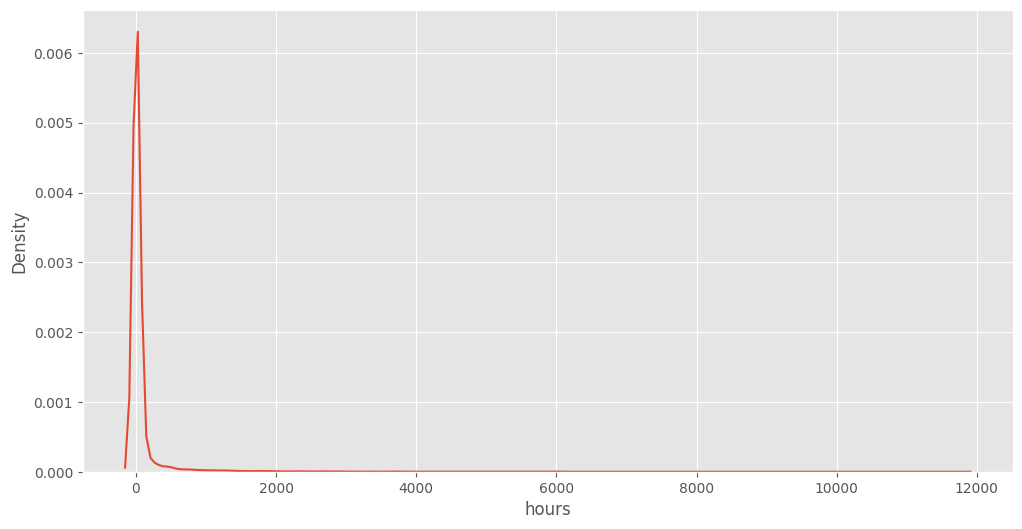

In [47]:
sns.kdeplot(df['hours'])

In [48]:
df["hours"].value_counts()


0.0       4059
0.2        352
0.3        350
0.4        301
0.5        287
          ... 
1177.0       1
1409.0       1
4074.0       1
626.0        1
1363.0       1
Name: hours, Length: 1123, dtype: int64

In [49]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)


In [50]:
max_val = df["hours"].max() 

In [51]:
max_val

11754.0

In [52]:
count_unique =df["game_name"].nunique()
print(count_unique)

144


<AxesSubplot: xlabel='hours'>

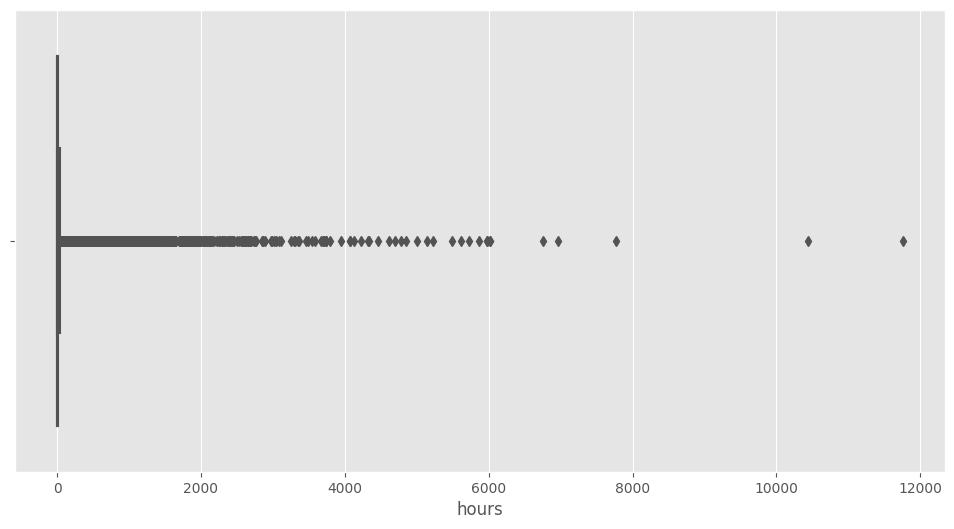

In [53]:

sns.boxplot( x=df["hours"])

In [54]:

df.drop(df[(df['hours'] >6500)].index, inplace=True)

In [55]:
df.drop(df[(df['hours'] < 1)].index, inplace=True)

In [56]:
cutoff=[0.0,3,10,40,150,6015.0]
labels=[1,2,3,4,5]

In [57]:
df["user_rating"]=pd.cut(df["hours"],bins=cutoff,labels=labels)

In [58]:
df['user_rating'] = pd.factorize(df['user_rating'])[0]

In [59]:
df['user_rating'].replace([0, 1,2,3,4],
                        [1, 2,3,4,5], inplace=True)

In [60]:
count_unique =df["user_rating"].nunique()
print(count_unique)

5


In [61]:
df["user_rating"]

0        1
1        1
2        2
3        1
4        3
        ..
16793    4
16794    2
16797    1
16799    4
16800    4
Name: user_rating, Length: 10356, dtype: int64

C:\Users\USCS\AppData\Local\Temp\ipykernel_2784\1440145788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df["user_rating"], hist=True, kde=False, rug=False )


<AxesSubplot: xlabel='user_rating'>

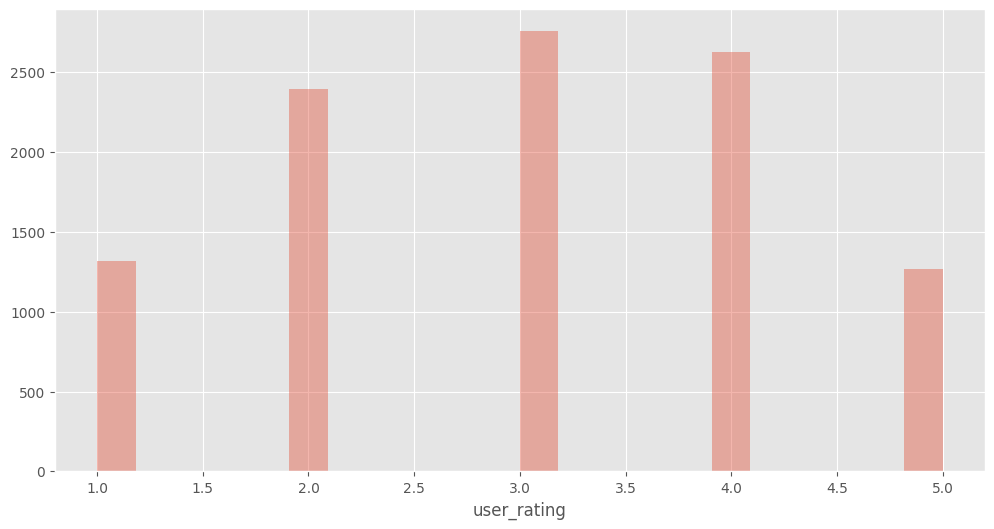

In [62]:
sns.distplot( a=df["user_rating"], hist=True, kde=False, rug=False )

In [63]:
#user_game_matrix=df.pivot_table(index='user_id', columns='game_name', values='user_rating',aggfunc='mean')

In [64]:
#user_game_matrix

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 16800
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10356 non-null  int64  
 1   game_name          10356 non-null  object 
 2   hours              10356 non-null  float64
 3   game_id            10356 non-null  int64  
 4   collection/name    10247 non-null  object 
 5   game_rating        9599 non-null   float64
 6   game_rating_count  9599 non-null   float64
 7   keywords           10356 non-null  object 
 8   game_modes         10356 non-null  object 
 9   genres             10356 non-null  object 
 10  themes             10356 non-null  object 
 11  franchises         10356 non-null  object 
 12  platforms          10356 non-null  object 
 13  similar_games      10356 non-null  object 
 14  user_rating        10356 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [66]:
df.describe()

,user_id,hours,game_id,game_rating,game_rating_count,user_rating
count,1.035600e+04,10356.000000,10356.000000,9599.000000,9599.000000,10356.000000
mean,1.235019e+08,117.489455,9438.198243,80.214104,851.760600,3.013132
std,7.706966e+07,411.292150,32544.813299,6.599954,866.769901,1.217458
min,5.250000e+03,1.000000,15.000000,32.935780,1.000000,1.000000
25%,5.992564e+07,3.300000,866.000000,79.961349,475.000000,2.000000
50%,1.137530e+08,10.700000,2963.000000,79.961349,475.000000,3.000000
75%,1.780385e+08,40.000000,2963.000000,84.629026,1157.000000,4.000000
max,3.092169e+08,6015.000000,228891.000000,94.394091,3663.000000,5.000000


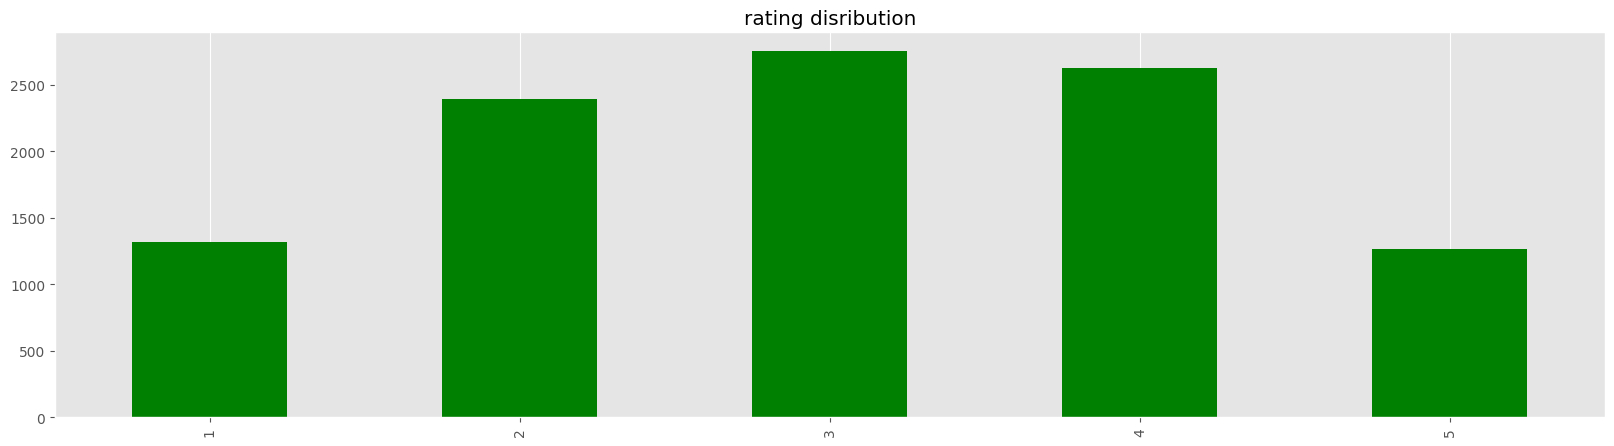

In [67]:
df["user_rating"].value_counts().sort_index().plot(kind="bar", color="green", title="rating disribution", 
                                                figsize=(20,5)).grid(axis='y')
plt.show()

In [68]:
df

,user_id,game_name,hours,game_id,collection/name,game_rating,game_rating_count,keywords,game_modes,genres,themes,franchises,platforms,similar_games,user_rating
0,151603712,Fallout 4,87.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
1,87445402,Fallout 4,83.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
2,25096601,Fallout 4,1.6,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",2
3,211925330,Fallout 4,133.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
4,115396529,Fallout 4,17.9,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,13190476,Mega Man Legacy Collection,6.4,19874,Mega Man Legacy Collections,94.394091,30.0,"['robot', 'side scroller', 'health', 'death', ...",['Single player'],"['Shooter', 'Platform', 'Adventure', 'Arcade']","['Action', 'Science fiction']",['Mega Man'],"['PC (Microsoft Windows)', 'Nintendo 3DS', 'Pl...","['Super Metroid', 'Mega Man X2', 'Street Fight...",4
16794,131348564,Submerged,2.3,11409,Submerged,60.165545,23.0,"['post-apocalyptic', 'ps4', 'dolphin', 'advent...",['Single player'],"['Puzzle', 'Adventure', 'Indie']","['Fantasy', 'Horror']",['Submerged'],"['PC (Microsoft Windows)', 'iOS', 'PlayStation...","['Ori and the Blind Forest', 'Get Even', 'Litt...",2
16797,204401529,Assassin's Creed Rogue,62.0,7570,Assassin's Creed,72.588896,364.0,"['pirates', 'assassin', 'stealth', 'templars',...","['Single player', 'Multiplayer']","['Role-playing (RPG)', 'Adventure']","['Action', 'Fantasy', 'Historical', 'Stealth',...","[""Assassin's Creed""]","['PC (Microsoft Windows)', 'PlayStation 3', 'X...","[""Assassin's Creed"", ""Assassin's Creed Revelat...",1
16799,190650796,Doodle God,6.4,18528,Doodle God,68.279088,22.0,"['dinosaurs', 'blood', 'wizards', 'vampire', '...",['Single player'],"['Puzzle', 'Simulator', 'Indie']",['Action'],['Doodle God'],"['Linux', 'PC (Microsoft Windows)', 'PlayStati...","['Minecraft', 'Limbo', 'The Witcher 3: Wild Hu...",4


In [69]:
df.describe()

,user_id,hours,game_id,game_rating,game_rating_count,user_rating
count,1.035600e+04,10356.000000,10356.000000,9599.000000,9599.000000,10356.000000
mean,1.235019e+08,117.489455,9438.198243,80.214104,851.760600,3.013132
std,7.706966e+07,411.292150,32544.813299,6.599954,866.769901,1.217458
min,5.250000e+03,1.000000,15.000000,32.935780,1.000000,1.000000
25%,5.992564e+07,3.300000,866.000000,79.961349,475.000000,2.000000
50%,1.137530e+08,10.700000,2963.000000,79.961349,475.000000,3.000000
75%,1.780385e+08,40.000000,2963.000000,84.629026,1157.000000,4.000000
max,3.092169e+08,6015.000000,228891.000000,94.394091,3663.000000,5.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 16800
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10356 non-null  int64  
 1   game_name          10356 non-null  object 
 2   hours              10356 non-null  float64
 3   game_id            10356 non-null  int64  
 4   collection/name    10247 non-null  object 
 5   game_rating        9599 non-null   float64
 6   game_rating_count  9599 non-null   float64
 7   keywords           10356 non-null  object 
 8   game_modes         10356 non-null  object 
 9   genres             10356 non-null  object 
 10  themes             10356 non-null  object 
 11  franchises         10356 non-null  object 
 12  platforms          10356 non-null  object 
 13  similar_games      10356 non-null  object 
 14  user_rating        10356 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [71]:
# df.groupby("user_id").count()["game_name"].sort_values(ascending=False).plot(
#     kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

In [72]:
tmp = df.copy()
#index was game_name
dtf_users = tmp.pivot_table(index="game_id", columns="user_id", values="user_rating",fill_value=math.nan)
dtf_users

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,308819212,308925132,308940605,308954355,309038666,309058572,309107542,309167186,309213952,309216884
game_id,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,3.0,3.0,NaN,3.0,3.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200875,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


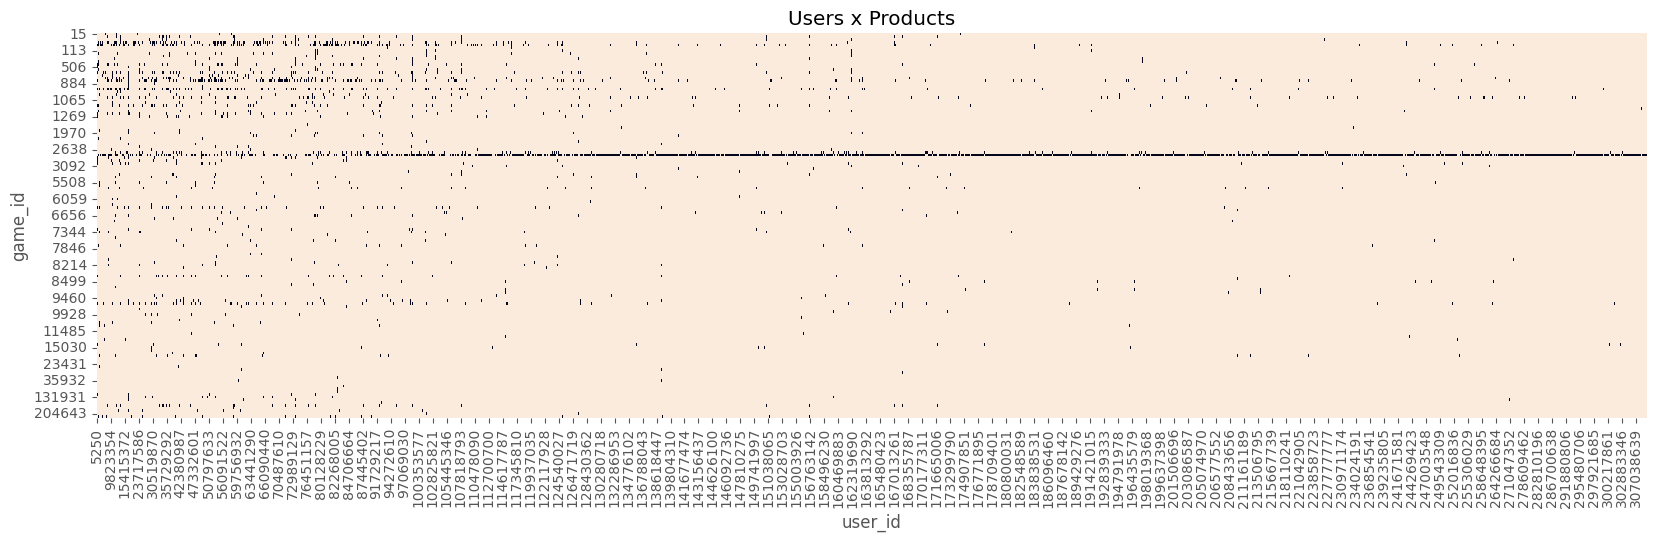

In [73]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_users.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Products")
plt.show()

# games matrix creation

In [74]:
dtf_products=df.copy()

In [75]:
    genresList= dtf_products["genres"].values[0]  
    for elem in genresList:
        print(elem)

[
'
S
h
o
o
t
e
r
'
,
 
'
R
o
l
e
-
p
l
a
y
i
n
g
 
(
R
P
G
)
'
]


In [76]:
number_of_rows = len(dtf_products.index)
i=0
for x in range(0,number_of_rows):      
      genresList= dtf_products["genres"].values[i]  
      listToStr = genresList.replace('[', '')
      listToStr = listToStr.replace(']', '')
     # print(genresList,listToStr) 
      dtf_products["genres"].values[i]=listToStr
      i+=1


In [77]:
# number_of_rows = len(dtf_products.index)
# i=0
# for x in range(0,number_of_rows):      
#       genresList= dtf_products["genres"].values[i]  
#       listToStr = ','.join([elem for elem in genresList])  
#       print(genresList,listToStr) 
#       dtf_products["genres"].values[i]=listToStr
#       i+=1

  

In [78]:
#was game name
dtf_products = dtf_products.filter(['game_id','genres'], axis=1)

In [79]:
display(dtf_products)

,game_id,genres
0,9630,"'Shooter', 'Role-playing (RPG)'"
1,9630,"'Shooter', 'Role-playing (RPG)'"
2,9630,"'Shooter', 'Role-playing (RPG)'"
3,9630,"'Shooter', 'Role-playing (RPG)'"
4,9630,"'Shooter', 'Role-playing (RPG)'"
...,...,...
16793,19874,"'Shooter', 'Platform', 'Adventure', 'Arcade'"
16794,11409,"'Puzzle', 'Adventure', 'Indie'"
16797,7570,"'Role-playing (RPG)', 'Adventure'"
16799,18528,"'Puzzle', 'Simulator', 'Indie'"


In [80]:
tags = [i.split(",") for i in dtf_products["genres"].unique()]
columns = list(set([i for lst in tags for i in lst]))
print(columns)

[" 'Strategy'", " 'Indie'", " 'Card & Board Game'", " 'Adventure'", " 'Real Time Strategy (RTS)'", " 'Arcade'", " 'Pinball'", "'Racing'", "'Point-and-click'", " 'Puzzle'", " 'Platform'", "'Puzzle'", ' "Hack and slash/Beat \'em up"', " 'Turn-based strategy (TBS)'", " 'Role-playing (RPG)'", " 'Sport'", " 'MOBA'", "'Strategy'", "'Shooter'", " 'Shooter'", "'Real Time Strategy (RTS)'", " 'Tactical'", "'Simulator'", "'Role-playing (RPG)'", "'Fighting'", "'Adventure'", '"Hack and slash/Beat \'em up"', " 'Simulator'", " 'Racing'", "'Sport'", "'Card & Board Game'", " 'Visual Novel'", "'Platform'"]


In [81]:
for col in columns:
    dtf_products[col] = dtf_products["genres"].apply(lambda x: 1 if col in x else 0)
dtf_products.head()

,game_id,genres,'Strategy','Indie','Card & Board Game','Adventure','Real Time Strategy (RTS)','Arcade','Pinball','Racing',...,'Role-playing (RPG)','Fighting','Adventure',"""Hack and slash/Beat 'em up""",'Simulator','Racing','Sport','Card & Board Game','Visual Novel','Platform'
0,9630,"'Shooter', 'Role-playing (RPG)'",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,9630,"'Shooter', 'Role-playing (RPG)'",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,9630,"'Shooter', 'Role-playing (RPG)'",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,9630,"'Shooter', 'Role-playing (RPG)'",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,9630,"'Shooter', 'Role-playing (RPG)'",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [82]:
dtf_products = dtf_products.drop_duplicates(subset = "game_id")

In [83]:
dtf_products.describe()

,game_id,'Strategy','Indie','Card & Board Game','Adventure','Real Time Strategy (RTS)','Arcade','Pinball','Racing','Point-and-click',...,'Role-playing (RPG)','Fighting','Adventure',"""Hack and slash/Beat 'em up""",'Simulator','Racing','Sport','Card & Board Game','Visual Novel','Platform'
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19848.378571,0.214286,0.221429,0.035714,0.500000,0.007143,0.035714,0.007143,0.035714,0.050000,...,0.250000,0.071429,0.542857,0.085714,0.100000,0.014286,0.057143,0.042857,0.014286,0.157143
std,42855.208015,0.411799,0.416699,0.186243,0.501795,0.084515,0.186243,0.084515,0.186243,0.218728,...,0.434568,0.258464,0.499949,0.280947,0.301077,0.119092,0.232949,0.203262,0.119092,0.365242
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1955.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7130.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10710.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,228891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
dtf_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 16799
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   game_id                        140 non-null    int64 
 1   genres                         140 non-null    object
 2    'Strategy'                    140 non-null    int64 
 3    'Indie'                       140 non-null    int64 
 4    'Card & Board Game'           140 non-null    int64 
 5    'Adventure'                   140 non-null    int64 
 6    'Real Time Strategy (RTS)'    140 non-null    int64 
 7    'Arcade'                      140 non-null    int64 
 8    'Pinball'                     140 non-null    int64 
 9   'Racing'                       140 non-null    int64 
 10  'Point-and-click'              140 non-null    int64 
 11   'Puzzle'                      140 non-null    int64 
 12   'Platform'                    140 non-null    int64 
 13  'Pu

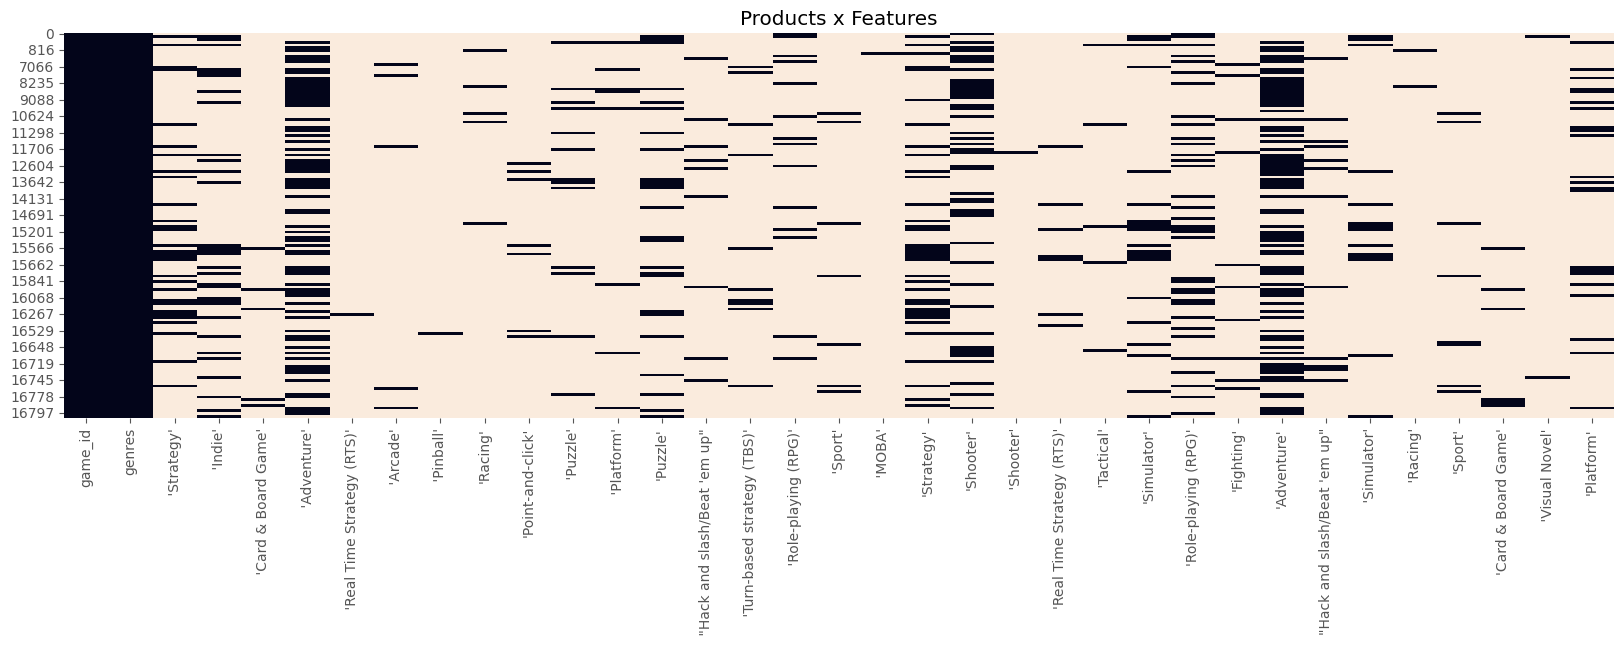

In [85]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_products==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")
plt.show()

# Model building

## Scaling and spliting

In [86]:
dtf_users = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(dtf_users.values), 
columns=dtf_users.columns, index=dtf_users.index)

In [87]:
split = int(0.8*dtf_users.shape[1])
split

4252

In [88]:
k=0
last_column_id=0
for i, j in dtf_users.iteritems():
    k+=1
    if k==split:
        last_column_id=i
        break

print(last_column_id) 

C:\Users\USCS\AppData\Local\Temp\ipykernel_2784\1971139448.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, j in dtf_users.iteritems():


229312905


In [89]:
# Train
dtf_train = dtf_users.loc[: ,:last_column_id]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
#dtf_train

non-null data: 8427


In [90]:
# Test
dtf_test = dtf_users.loc[:, last_column_id:]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
#dtf_test

non-null data: 1128


## Content based recommendation model

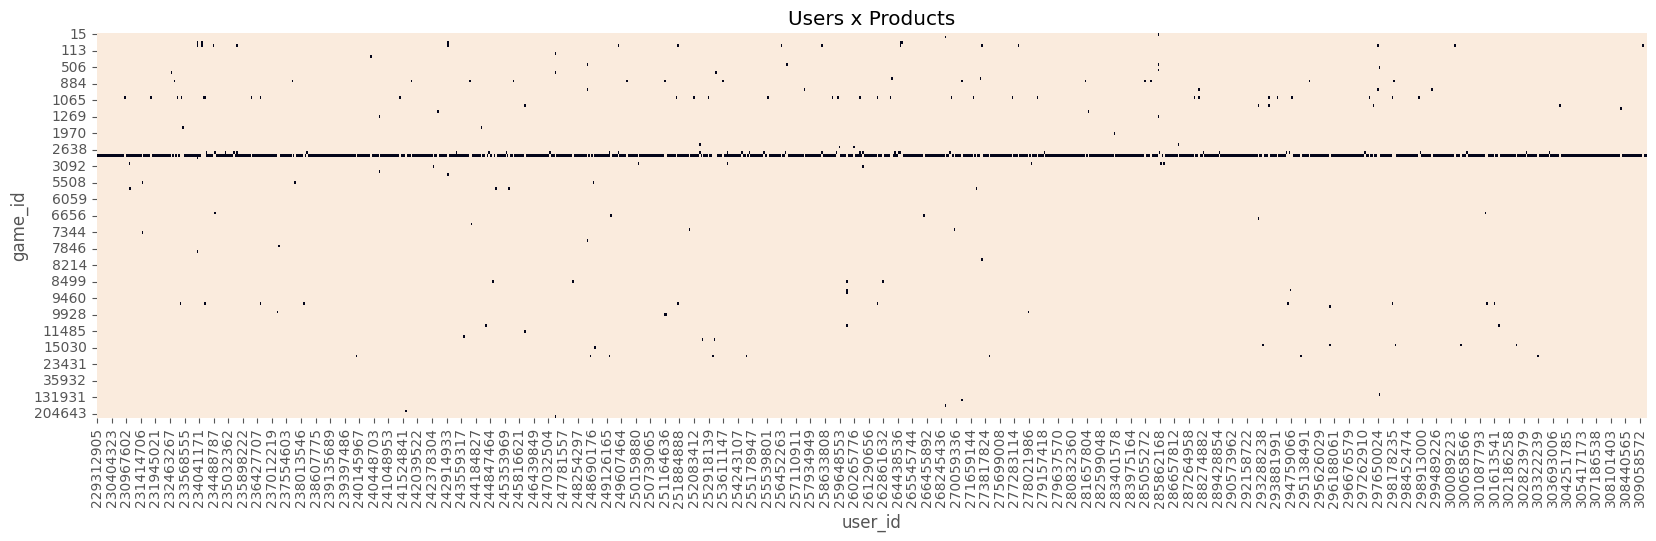

In [91]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_test.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Products")
plt.show()

In [92]:
display(dtf_train)

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,228908339,228912039,228919399,228972514,229022162,229095219,229173482,229203462,229285089,229312905
game_id,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,0.833333,NaN,1.000000,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.5,1.0,NaN,0.833333,0.833333,NaN,0.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200875,NaN,NaN,NaN,NaN,0.833333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Select a user
i = 2
train = dtf_train.iloc[:,i].to_frame(name="user_rating")
test = dtf_test.iloc[:,i].to_frame(name="user_rating")
print("train:", len(train[~train["user_rating"].isna()]), "| test:", len(test[~test["user_rating"].isna()]))

train

train: 1 | test: 1


,user_rating
game_id,
15,NaN
20,NaN
21,NaN
71,NaN
72,NaN
...,...
152660,NaN
165247,NaN
200875,NaN


In [94]:
# add all products in test but empty
tmp = test.copy()
tmp["user_rating"] = np.nan
#train = train.append(tmp)
#train

In [95]:
train

,user_rating
game_id,
15,NaN
20,NaN
21,NaN
71,NaN
72,NaN
...,...
152660,NaN
165247,NaN
200875,NaN


In [96]:
# Model
usr = train[["user_rating"]].fillna(0).values.T
prd = dtf_products.drop(["game_id","genres"],axis=1).values
print("Users", usr.shape, " x  Products", prd.shape)

Users (1, 140)  x  Products (140, 33)


In [97]:
usr

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [98]:
# Numpy
import numpy as np

## usr_ft(users,fatures) = usr(users,products) x prd(products,features)
usr_ft = np.dot(usr, prd)
## normalize
weights = usr_ft / usr_ft.sum()
## predicted rating(users,products) = weights(users,fatures) x prd.T(features,products)
pred = np.dot(weights, prd.T)

test = test.merge(pd.DataFrame(pred[0], columns=["yhat"]), how="left", left_index=True, right_index=True).reset_index()
test = test[~test["user_rating"].isna()]
test

,game_id,user_rating,yhat
44,2963,0.5,NaN


In [99]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

In [100]:
print("--- user", i, "---")

top = 100
y_test = test.sort_values("user_rating", ascending=False)["game_id"].values[:top]
print("y_test:", y_test)

predicted = test.sort_values("yhat", ascending=False)["game_id"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 2 ---
y_test: [2963]
predicted: [2963]
true positive: 1 (1.0%)
accuracy: 100.0%
mrr: 1.0


In [101]:
dtf_train

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,228908339,228912039,228919399,228972514,229022162,229095219,229173482,229203462,229285089,229312905
game_id,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,0.833333,NaN,1.000000,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.5,1.0,NaN,0.833333,0.833333,NaN,0.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200875,NaN,NaN,NaN,NaN,0.833333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,game_id,user_id,y
0,15,6928806,0.500000
1,15,9128105,0.833333
2,15,11813637,0.666667
3,15,12144171,0.500000
4,15,23386002,0.500000


In [103]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,game_id,user_id,y
0,15,285860790,1.000000
1,20,268487512,0.500000
2,71,234024191,0.833333
3,71,234108053,0.500000
4,71,242937979,0.500000


In [104]:
dtf_users

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,308819212,308925132,308940605,308954355,309038666,309058572,309107542,309167186,309213952,309216884
game_id,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,0.833333,NaN,1.000000,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.5,1.0,NaN,0.833333,0.833333,NaN,0.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200875,NaN,NaN,NaN,NaN,0.833333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:

pip install recommenders[examples]

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.6.0 Requires-Python >=3.6, <=3.8; 0.7.0 Requires-Python >=3.6, <3.8; 1.0.0 Requires-Python >=3.6, <3.9; 1.1.0 Requires-Python >=3.6, <3.10; 1.1.1 Requires-Python >=3.6, <3.10
ERROR: Could not find a version that satisfies the requirement recommenders[examples] (from versions: none)
ERROR: No matching distribution found for recommenders[examples]


In [106]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))
xproducts_emb = layers.Embedding(name="xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
xproducts = layers.Reshape(name='xproducts', target_shape=(embeddings_size,))(xproducts_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xproducts])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xusers_in (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 xproducts_in (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 xusers_emb (Embedding)         (None, 1, 50)        7000        ['xusers_in[0][0]']              
                                                                                                  
 xproducts_emb (Embedding)      (None, 1, 50)        265800      ['xproducts_in[0][0]']           
                                                                             

In [107]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [108]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8427 entries, 0 to 8426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  8427 non-null   int64  
 1   user_id  8427 non-null   int64  
 2   y        8427 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 197.6 KB


In [110]:
train.dtypes

game_id      int64
user_id      int64
y          float64
dtype: object

In [111]:
# # train
# training = model.fit(x=[train["user_id"], train["game_id"]], y=train["y"], epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
# model = training.model
# #utils_plot_keras_training(training)

## User based collabrative filtering

In [112]:
df.head()

,user_id,game_name,hours,game_id,collection/name,game_rating,game_rating_count,keywords,game_modes,genres,themes,franchises,platforms,similar_games,user_rating
0,151603712,Fallout 4,87.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
1,87445402,Fallout 4,83.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
2,25096601,Fallout 4,1.6,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",2
3,211925330,Fallout 4,133.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",1
4,115396529,Fallout 4,17.9,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",3


In [113]:
# Aggregate by games
agg_ratings = df.groupby('game_name').agg(mean_rating = ('user_rating', 'mean'),
                                                number_of_ratings = ('user_rating', 'count')).reset_index()
# Keep the games with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings_GT100.info()
display(agg_ratings_GT100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 134
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_name          82 non-null     object 
 1   mean_rating        82 non-null     float64
 2   number_of_ratings  82 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


,game_name,mean_rating,number_of_ratings
1,Aliens vs. Predator,2.772727,66
3,Assassin's Creed,3.029412,68
4,Assassin's Creed Brotherhood,2.600000,35
5,Assassin's Creed II,2.641509,53
6,Assassin's Creed III,2.618182,55
...,...,...,...
127,Undertale,3.206897,29
128,Valkyria Chronicles,3.047619,42
130,Warframe,3.054496,367
132,Watch_Dogs,2.939394,33


In [114]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,game_name,mean_rating,number_of_ratings
32,Dota 2,3.188985,3831
76,Portal,3.087977,682
89,Sid Meier's Civilization V,2.932171,516
77,Portal 2,3.095923,417
11,BioShock,2.960000,400


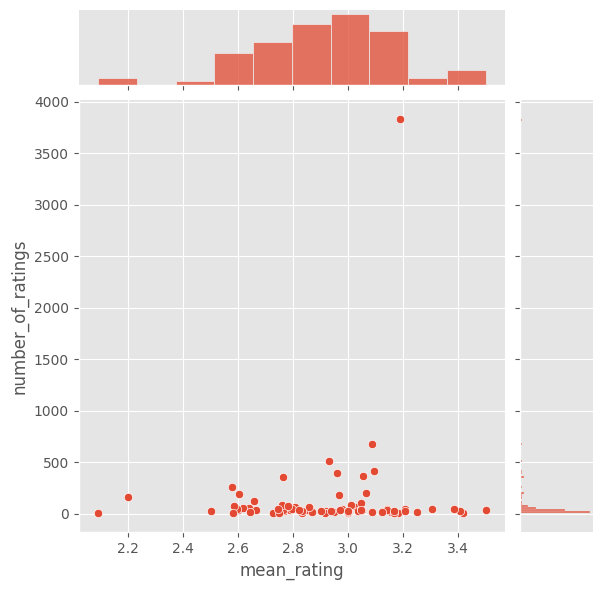

In [115]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [116]:
df_GT100 = pd.merge(df, agg_ratings_GT100[['game_name']], on='game_name', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10130 entries, 0 to 10129
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10130 non-null  int64  
 1   game_name          10130 non-null  object 
 2   hours              10130 non-null  float64
 3   game_id            10130 non-null  int64  
 4   collection/name    10024 non-null  object 
 5   game_rating        9386 non-null   float64
 6   game_rating_count  9386 non-null   float64
 7   keywords           10130 non-null  object 
 8   game_modes         10130 non-null  object 
 9   genres             10130 non-null  object 
 10  themes             10130 non-null  object 
 11  franchises         10130 non-null  object 
 12  platforms          10130 non-null  object 
 13  similar_games      10130 non-null  object 
 14  user_rating        10130 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


In [117]:
# Number of users
print('The ratings dataset has', df_GT100['user_id'].nunique(), 'unique users')
# Number of game
print('The ratings dataset has', df_GT100['game_id'].nunique(), 'unique game')
# Number of ratings
print('The ratings dataset has', df_GT100['user_rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['user_rating'].unique()))
# The ratings dataset has 597 unique users
# The ratings dataset has 134 unique movies
# The ratings dataset has 10 unique ratings
# The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

The ratings dataset has 5296 unique users
The ratings dataset has 86 unique game
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [118]:
matrix = df_GT100.pivot_table(index='user_id', columns='game_name', values='user_rating')
matrix.head()

game_name,Aliens vs. Predator,Assassin's Creed,Assassin's Creed Brotherhood,Assassin's Creed II,Assassin's Creed III,Assassin's Creed IV Black Flag,Assassin's Creed Revelations,BioShock,BioShock 2,BioShock Infinite,...,The Wolf Among Us,To the Moon,Tomb Raider,Trine 2,Ultra Street Fighter IV,Undertale,Valkyria Chronicles,Warframe,Watch_Dogs,Worms Reloaded
user_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
298950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,4.0,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
561758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

game_name,Aliens vs. Predator,Assassin's Creed,Assassin's Creed Brotherhood,Assassin's Creed II,Assassin's Creed III,Assassin's Creed IV Black Flag,Assassin's Creed Revelations,BioShock,BioShock 2,BioShock Infinite,...,The Wolf Among Us,To the Moon,Tomb Raider,Trine 2,Ultra Street Fighter IV,Undertale,Valkyria Chronicles,Warframe,Watch_Dogs,Worms Reloaded
user_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
298950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235294,...,1.235294,NaN,0.235294,-0.764706,NaN,-0.764706,NaN,NaN,NaN,NaN
561758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
display(user_similarity)

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,308819212,308925132,308940605,308954355,309038666,309058572,309107542,309167186,309213952,309216884
user_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,1.0,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298950,NaN,NaN,NaN,1.0,-1.0,NaN,0.188982,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561758,NaN,NaN,NaN,-1.0,1.0,NaN,-0.188982,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309058572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309107542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309167186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
picked_userid = 298950	
# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

user_id,5250,76767,229911,298950,561758,748719,975449,994489,1129452,1612666,...,308819212,308925132,308940605,308954355,309038666,309058572,309107542,309167186,309213952,309216884
user_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,1.0,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561758,NaN,NaN,NaN,-1.0,1.0,NaN,-0.188982,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748719,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Number of similar users
n = 10
# User similarity threashold
user_similarity_threshold = 0.3
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False).iloc[:n]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 298950 are user_id
1936551      1.0
88344296     1.0
106986812    1.0
106760673    1.0
103624897    1.0
102921672    1.0
101212067    1.0
94110492     1.0
93341815     1.0
92593907     1.0
Name: 298950, dtype: float64


In [123]:
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

game_name,BioShock Infinite,Borderlands,Borderlands 2,Darksiders II,Dying Light,Fallout 4,Mortal Kombat X,Orcs Must Die! 2,Portal 2,Shadowrun Returns,Sid Meier's Civilization V,Sleeping Dogs,Sonic Generations,The Wolf Among Us,Tomb Raider,Trine 2,Undertale
user_id,,,,,,,,,,,,,,,,,
298950,0.235294,1.235294,-1.764706,0.235294,1.235294,-1.764706,0.235294,1.235294,0.235294,0.235294,-1.764706,-0.764706,1.235294,1.235294,0.235294,-0.764706,-0.764706


In [124]:
similar_user_games = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_games

game_name,Aliens vs. Predator,Assassin's Creed Brotherhood,Assassin's Creed III,Assassin's Creed IV Black Flag,Assassin's Creed Revelations,BioShock Infinite,Blackguards,Borderlands,Borderlands 2,Darksiders II,...,Sid Meier's Civilization V,Sid Meier's Railroads!,Sleeping Dogs,Star Trek Online,Stronghold 3,The Banner Saga,Tomb Raider,Trine 2,Warframe,Worms Reloaded
user_id,,,,,,,,,,,,,,,,,,,,,
1936551,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,NaN,0.400000,NaN,...,NaN,-0.6,NaN,NaN,NaN,0.4,NaN,1.400000,NaN,-0.6
88344296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.833333,NaN,...,NaN,NaN,NaN,1.166667,-0.833333,NaN,NaN,NaN,0.166667,NaN
92593907,-0.285714,-0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.285714,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,NaN,NaN
93341815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,-1.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000,NaN
94110492,NaN,NaN,NaN,0.125,NaN,1.125000,NaN,NaN,-0.875000,NaN,...,-0.875000,NaN,0.125000,-1.875000,1.125000,NaN,1.125,NaN,NaN,NaN
101212067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.500000,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN
102921672,NaN,NaN,1.25,NaN,NaN,NaN,NaN,NaN,-0.750000,0.25,...,-0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103624897,NaN,NaN,NaN,NaN,-0.666667,1.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106760673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.000000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN


In [125]:
similar_user_games.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')
# Take a look at the data
similar_user_games

game_name,Aliens vs. Predator,Assassin's Creed Brotherhood,Assassin's Creed III,Assassin's Creed IV Black Flag,Assassin's Creed Revelations,Blackguards,Dota 2,Grand Theft Auto IV,Grand Theft Auto V,LEGO Worlds,...,Nosgoth,Ori and the Blind Forest,Portal,Rayman Legends,Sid Meier's Railroads!,Star Trek Online,Stronghold 3,The Banner Saga,Warframe,Worms Reloaded
user_id,,,,,,,,,,,,,,,,,,,,,
1936551,NaN,NaN,NaN,NaN,NaN,-0.6,NaN,NaN,NaN,0.4,...,NaN,-0.6,NaN,-1.6,-0.6,NaN,NaN,0.4,NaN,-0.6
88344296,NaN,NaN,NaN,NaN,NaN,NaN,-0.833333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.166667,-0.833333,NaN,0.166667,NaN
92593907,-0.285714,-0.285714,NaN,NaN,NaN,NaN,1.714286,-1.285714,NaN,NaN,...,-0.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93341815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.25,NaN,NaN,NaN,NaN,NaN,1.250000,NaN
94110492,NaN,NaN,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.875000,1.125000,NaN,NaN,NaN
101212067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102921672,NaN,NaN,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103624897,NaN,NaN,NaN,NaN,-0.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106760673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# A dictionary to store item scores
item_score = {}
# Loop through items
for i in similar_user_games.columns:
  # Get the ratings for movie i
  game_rating = similar_user_games[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    if pd.isna(game_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * game_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['game', 'game_score'])
    
# Sort the games by score
ranked_item_score = item_score.sort_values(by='game_score', ascending=False)
# Select top m games
m = 300
#ranked_item_score.head(m)
ranked_item_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 10 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game        21 non-null     object 
 1   game_score  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


## User based deep collabrative filtering

In [127]:
#user encoding
user_ids = df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

In [233]:
userencoded2user

{0: 151603712,
 1: 87445402,
 2: 25096601,
 3: 211925330,
 4: 115396529,
 5: 4834220,
 6: 65958466,
 7: 91800733,
 8: 43913966,
 9: 64787956,
 10: 68316900,
 11: 48028873,
 12: 131940023,
 13: 89732768,
 14: 115037563,
 15: 13565651,
 16: 65420540,
 17: 101690993,
 18: 53898495,
 19: 77830706,
 20: 76420334,
 21: 45974860,
 22: 39082468,
 23: 24469287,
 24: 39622853,
 25: 111754806,
 26: 99077905,
 27: 9128105,
 28: 12259303,
 29: 77124916,
 30: 2259650,
 31: 59115473,
 32: 233424343,
 33: 71390526,
 34: 234190577,
 35: 98624963,
 36: 183337134,
 37: 110906645,
 38: 298950,
 39: 62878249,
 40: 50801801,
 41: 173940259,
 42: 212570211,
 43: 100351493,
 44: 73518199,
 45: 100311267,
 46: 301299641,
 47: 46637811,
 48: 171067153,
 49: 170460109,
 50: 60859324,
 51: 33282871,
 52: 49893565,
 53: 27262175,
 54: 66464409,
 55: 43684632,
 56: 94269421,
 57: 167302978,
 58: 86055705,
 59: 66255019,
 60: 39037163,
 61: 108007732,
 62: 70408902,
 63: 191126693,
 64: 30699429,
 65: 24721232,
 66:

In [128]:
#game encoding
game_ids = df["game_id"].unique().tolist()
game2game_encoded = {x: i for i, x in enumerate(game_ids)}
game_encoded2game = {i: x for i, x in enumerate(game_ids)}

In [129]:
df["user"] = df["user_id"].map(user2user_encoded)
df["game"] = df["game_id"].map(game2game_encoded)

In [234]:
display(df)

,user_id,game_name,hours,game_id,collection/name,game_rating,game_rating_count,keywords,game_modes,genres,themes,franchises,platforms,similar_games,user_rating,user,game
6625,134322141,BioShock,4.1,20,Bioshock,87.230233,2147.0,"['ghosts', 'assassin', 'blood', 'stealth', 'un...",['Single player'],"['Shooter', 'Role-playing (RPG)', 'Adventure']","['Action', 'Science fiction', 'Horror']",['Bioshock'],"['PC (Microsoft Windows)', 'Xbox 360', 'Mac']","['BioShock 2', 'Dishonored', 'BioShock Infinit...",4.0,427,8
4406,188421568,Dota 2,648.0,2963,Dota,79.961349,475.0,"['ghosts', 'free to play ( f2p )', 'blood', 'm...","['Multiplayer', 'Co-operative']","['Strategy', 'MOBA']","['Action', 'Fantasy', 'Warfare']",['Defense of the Ancients'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['League of Legends', 'Darkstone', 'The Elder ...",5.0,3070,7
1570,197765864,Dota 2,4.5,2963,Dota,79.961349,475.0,"['ghosts', 'free to play ( f2p )', 'blood', 'm...","['Multiplayer', 'Co-operative']","['Strategy', 'MOBA']","['Action', 'Fantasy', 'Warfare']",['Defense of the Ancients'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['League of Legends', 'Darkstone', 'The Elder ...",4.0,940,7
6407,58761868,BioShock,31.0,20,Bioshock,NaN,NaN,"['ghosts', 'assassin', 'blood', 'stealth', 'un...",['Single player'],['Shooter'],"['Action', 'Science fiction']",['Bioshock'],['PC (Microsoft Windows)'],"['BioShock 2', 'Dishonored', 'BioShock Infinit...",3.0,96,8
7392,77194239,Sid Meier's Civilization V,45.0,866,Civilization,85.589221,886.0,"['modern warfare', 'helicopter', 'robot', 'exp...","['Single player', 'Multiplayer']","['Simulator', 'Strategy', 'Turn-based strategy...","['Fantasy', 'Science fiction', 'Historical', '...",['Sid Meier'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['Supreme Commander', ""Sid Meier's Civilizatio...",1.0,406,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,302477662,Undertale,13.4,12517,Undertale,86.691211,1188.0,"['retro', 'psychological horror', 'dark', 'dun...",['Single player'],"['Role-playing (RPG)', 'Turn-based strategy (T...","['Fantasy', 'Horror', 'Comedy', 'Drama']",['Undertale'],"['Linux', 'PC (Microsoft Windows)', 'Mac', 'Pl...","['Chasm', 'Momodora: Reverie Under the Moonlig...",3.0,4548,14
7141,142650116,Sid Meier's Civilization V,53.0,866,Civilization,85.589221,886.0,"['modern warfare', 'helicopter', 'robot', 'exp...","['Single player', 'Multiplayer']","['Simulator', 'Strategy', 'Turn-based strategy...","['Fantasy', 'Science fiction', 'Historical', '...",['Sid Meier'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['Supreme Commander', ""Sid Meier's Civilizatio...",1.0,4284,12
7375,151331732,Sid Meier's Civilization V,48.0,866,Civilization,85.589221,886.0,"['modern warfare', 'helicopter', 'robot', 'exp...","['Single player', 'Multiplayer']","['Simulator', 'Strategy', 'Turn-based strategy...","['Fantasy', 'Science fiction', 'Historical', '...",['Sid Meier'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['Supreme Commander', ""Sid Meier's Civilizatio...",1.0,4387,12
1145,180331040,Dota 2,1256.0,2963,Dota,79.961349,475.0,"['ghosts', 'free to play ( f2p )', 'blood', 'm...","['Multiplayer', 'Co-operative']","['Strategy', 'MOBA']","['Action', 'Fantasy', 'Warfare']",['Defense of the Ancients'],"['Linux', 'PC (Microsoft Windows)', 'Mac']","['League of Legends', 'Darkstone', 'The Elder ...",5.0,606,7


In [130]:
#df[["user","user_id"]]

In [131]:
num_users = len(user2user_encoded)
num_games = len(game_encoded2game)
df["user_rating"] = df["user_rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["user_rating"])
max_rating = max(df["user_rating"])

print(
    "Number of users: {}, Number of games: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_games, min_rating, max_rating
    )
)

Number of users: 5316, Number of games: 140, Min rating: 1.0, Max rating: 5.0


In [132]:
df['user_rating'].unique().tolist()

[1.0, 2.0, 3.0, 4.0, 5.0]

In [133]:
print(x)

10355


In [134]:

user_ids = df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
game_ids = df["game_id"].unique().tolist()
game2game_encoded = {x: i for i, x in enumerate(game_ids)}
game_encoded2game = {i: x for i, x in enumerate(game_ids)}
df["user"] = df["user_id"].map(user2user_encoded)
df["game"] = df["game_id"].map(game2game_encoded)

num_users = len(user2user_encoded)
num_movies = len(game_encoded2game)
df["user_rating"] = df["user_rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["user_rating"])
max_rating = max(df["user_rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 5316, Number of Movies: 140, Min rating: 1.0, Max rating: 5.0


In [135]:
#randomization
df = df.sample(frac=1, random_state=42)
x = df[["user", "game"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["user_rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [235]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        #categorical variable with a high cardinality
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    # metrics=["accuracy"]
)

In [236]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/100
146/146 [==============================] - 5s 18ms/step - loss: 0.6946 - val_loss: 0.6932
Epoch 2/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6972 - val_loss: 0.6937
Epoch 3/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6970 - val_loss: 0.6926
Epoch 4/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6907
Epoch 5/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6956 - val_loss: 0.6916
Epoch 6/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6899
Epoch 7/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6887
Epoch 8/100
146/146 [==============================] - 1s 5ms/step - loss: 0.6846 - val_loss: 0.6885
Epoch 9/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6806 - val_loss: 0.6873
Epoch 10/100
146/146 [==============================] - 1s 4ms/step - loss: 0.6754 - val_l

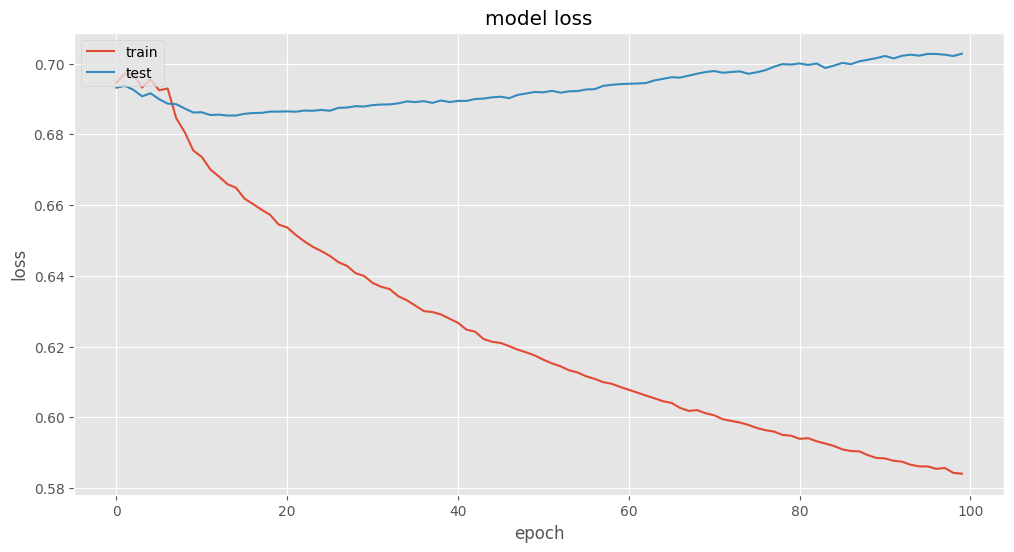

In [238]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#plt.plot(history.history["accuracy"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

### Model Execution

In [239]:
user_id = df.user_id.sample(1).iloc[0]

In [240]:
user_id

77124916

In [241]:
games_played_by_user = df[df.user_id == user_id]
games_not_played = games_df[
    ~games_df["id"].isin(games_played_by_user.game_id.values)
]["id"]

In [242]:
games_not_played  = list(
    set(games_not_played ).intersection(set(game2game_encoded.keys()))
)

In [243]:
games_not_played = [[game2game_encoded.get(x)] for x in games_not_played]

In [244]:
user_encoder = user2user_encoded.get(user_id)

In [245]:
user_game_array = np.hstack(
    ([[user_encoder]] * len(games_not_played), games_not_played)
)

In [246]:
display(len(user_game_array))

137

In [247]:

display(user_game_array)

array([[ 29,  11],
       [ 29, 127],
       [ 29, 124],
       [ 29,  40],
       [ 29,   8],
       [ 29,  10],
       [ 29,  21],
       [ 29,  53],
       [ 29,  72],
       [ 29,  73],
       [ 29,   5],
       [ 29,  78],
       [ 29,  42],
       [ 29, 125],
       [ 29, 133],
       [ 29, 129],
       [ 29, 135],
       [ 29,  58],
       [ 29, 108],
       [ 29, 130],
       [ 29,  27],
       [ 29,  20],
       [ 29, 120],
       [ 29, 103],
       [ 29, 116],
       [ 29,   9],
       [ 29, 101],
       [ 29, 139],
       [ 29,  23],
       [ 29,  54],
       [ 29,  39],
       [ 29,  51],
       [ 29,  84],
       [ 29,  32],
       [ 29,  16],
       [ 29,  95],
       [ 29,   3],
       [ 29,  98],
       [ 29, 137],
       [ 29, 126],
       [ 29,  55],
       [ 29, 113],
       [ 29,  60],
       [ 29,  25],
       [ 29,  13],
       [ 29,  71],
       [ 29,  36],
       [ 29,  75],
       [ 29,  83],
       [ 29,  31],
       [ 29,  90],
       [ 29,  69],
       [ 29,

In [248]:

ratings = model.predict(user_game_array).flatten()

5/5 [==============================] - 0s 2ms/step


In [249]:
games_played_by_user

,user_id,game_name,hours,game_id,collection/name,game_rating,game_rating_count,keywords,game_modes,genres,themes,franchises,platforms,similar_games,user_rating,user,game
30,77124916,Fallout 4,361.0,9630,Fallout,80.177727,1157.0,"['cold war', 'hunting', 'robot', 'post-apocaly...",['Single player'],"['Shooter', 'Role-playing (RPG)']","['Action', 'Science fiction', 'Survival', 'San...",['Fallout'],"['PC (Microsoft Windows)', 'PlayStation 4', 'X...","['Fallout', 'Fallout 2', 'Fallout 3', 'Fallout...",5.0,29,0
16680,77124916,Front Mission Evolved,27.0,1508,Front Mission,65.574092,9.0,"['vehicular combat', 'robot', 'mech', 'space s...","['Single player', 'Multiplayer', 'Co-operative']","['Shooter', 'Simulator']","['Action', 'Science fiction', 'Warfare']",['Front Mission'],"['PC (Microsoft Windows)', 'PlayStation 3', 'X...","['Cyberpunk 2077', 'Space Engineers', 'Get Eve...",3.0,29,117
8010,77124916,Grand Theft Auto V,460.0,1020,Grand Theft Auto,90.232762,3663.0,"['aliens', 'you get to be evil!', 'crime-life'...","['Single player', 'Multiplayer', 'Co-operative']","['Shooter', 'Adventure']","['Action', 'Comedy', 'Sandbox', 'Open world']",['Grand theft Auto'],"['PC (Microsoft Windows)', 'PlayStation 3', 'X...","['Mafia II', 'L.A. Noire', 'Grand Theft Auto: ...",5.0,29,17


In [252]:
top_ratings_indices = ratings.argsort()[-100:][::-1]
recommended_game_ids = [
    game_encoded2game.get(games_not_played[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_games_user = (
    games_played_by_user.sort_values(by="user_rating", ascending=False)
    .head(5)
    .game_id.values
) 
game_df_rows = games_df[games_df["id"].isin(top_games_user)]
for row in game_df_rows.itertuples():
    print(row.game_name, ":", row.genres)

print("----" * 8)
print("Top 10 game recommendations")
print("----" * 8)
recommended_games = games_df[games_df["id"].isin(recommended_game_ids)]
for row in recommended_games.itertuples():
    print(row.game_name, ":", row.genres)

Showing recommendations for user: 77124916
Movies with high ratings from user
--------------------------------
Front Mission Evolved : ['Shooter', 'Simulator']
Grand Theft Auto V : ['Shooter', 'Adventure']
Fallout 4 : ['Shooter', 'Role-playing (RPG)']
--------------------------------
Top 10 game recommendations
--------------------------------
Dungeons & Dragons Online : ['Role-playing (RPG)', 'Adventure']
Valkyria Chronicles : ['Role-playing (RPG)', 'Strategy', 'Turn-based strategy (TBS)', 'Tactical']
Crysis Wars : ['Shooter']
Stronghold Legends : ['Real Time Strategy (RTS)', 'Simulator', 'Strategy']
Street Fighter IV : ['Fighting']
PixelJunk Eden : ['Platform', 'Puzzle', 'Adventure', 'Indie']
Sid Meier's Railroads! : ['Simulator', 'Strategy']
Crysis : ['Shooter', 'Adventure']
Crysis Warhead : ['Shooter', 'Adventure']
Prince of Persia : ['Platform', 'Puzzle', 'Adventure']
Grand Theft Auto IV : ['Shooter', 'Racing', 'Adventure']
Tom Clancy's Ghost Recon Advanced Warfighter : ['Shooter'

In [ ]:
# Street Fighter IV : ['Fighting']
# Crysis Warhead : ['Shooter', 'Adventure']
# Rogue Trooper : ['Shooter']
# DeathSpank : ['Fighting', 'Role-playing (RPG)', "Hack and slash/Beat 'em up", 'Adventure', 'Indie']
# Doodle God : ['Puzzle', 'Simulator', 'Indie']
# Deadpool : ['Shooter', "Hack and slash/Beat 'em up", 'Adventure']
# Street Fighter X Tekken : ['Fighting', 'Arcade']
# Mega Man Legacy Collection : ['Shooter', 'Platform', 'Adventure', 'Arcade']
# Crysis Warhead : ['Shooter']
# Rogue Trooper : ['Shooter']
# Street Fighter IV : ['Fighting']
# Rune Classic : ["Hack and slash/Beat 'em up", 'Adventure']
# Stronghold 2 : ['Real Time Strategy (RTS)', 'Simulator', 'Strategy']
# Doodle God : ['Puzzle', 'Simulator', 'Indie']

In [251]:
ratings.sort()

ratings

array([0.5180799 , 0.5377802 , 0.5645733 , 0.5707623 , 0.58107835,
       0.58251065, 0.5830431 , 0.58484197, 0.5905437 , 0.60372   ,
       0.6061102 , 0.61436033, 0.62331945, 0.62625384, 0.63522196,
       0.63566947, 0.6402706 , 0.6490632 , 0.663446  , 0.66834354,
       0.6697272 , 0.6763088 , 0.6807554 , 0.68381774, 0.6975526 ,
       0.6990524 , 0.70272475, 0.7098827 , 0.7109131 , 0.71139693,
       0.7210448 , 0.7250277 , 0.7257461 , 0.7261896 , 0.7264    ,
       0.7291754 , 0.7297902 , 0.7307329 , 0.7367059 , 0.73829395,
       0.7437781 , 0.744261  , 0.7445349 , 0.745266  , 0.7489567 ,
       0.7492319 , 0.7494428 , 0.74980134, 0.75054324, 0.7520852 ,
       0.75335133, 0.7558603 , 0.75679654, 0.7569255 , 0.757414  ,
       0.7583971 , 0.76020944, 0.7604572 , 0.7616829 , 0.7618169 ,
       0.76352465, 0.76422626, 0.765084  , 0.7676706 , 0.7698284 ,
       0.77025974, 0.7702622 , 0.7708905 , 0.7722892 , 0.7755186 ,
       0.7755283 , 0.7763976 , 0.7766391 , 0.7768787 , 0.77693

In [151]:

# Let us get a user and see the top recommendations.
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(game2game_encoded.keys()))
)
movies_not_watched = [[game2game_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    game_encoded2game.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

AttributeError: 'DataFrame' object has no attribute 'userId'